In [1]:
from pleiades.wipplsystems import PCX
from pleiades.grids import RectGrid
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Rectangle

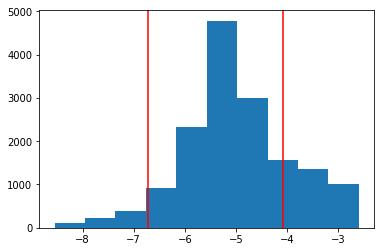

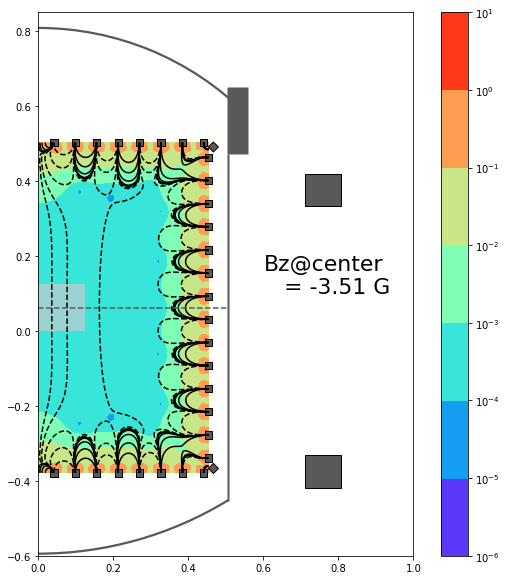

In [2]:
pcx = PCX()
## 2A cancels out field in center ##
pcx.HH.currents = [0]*2

RZgrid = RectGrid((0,.453,90),(-0.379,0.502,176))
R,Z = RZgrid.R,RZgrid.Z
pcx.grid = RZgrid
Br = pcx.BR
Bz = pcx.BZ - 5.1e-5 ###earth's field @ chambo is 0.51Gauss downward
B = np.sqrt(Br**2+Bz**2)
Bz_test = Bz[np.where(np.logical_and(R<=0.124,np.logical_and(0<=Z,Z<=0.124)))]
Bz_avg = np.mean(Bz_test)
psi = pcx.psi
mn,mx = np.percentile(np.log10(np.abs(psi[psi.nonzero()])).flatten(),[5,80])

f,ax=plt.subplots()
ax.hist(np.log10(np.abs(psi[psi.nonzero()])).flatten())
ax.axvline(mn,color='r')
ax.axvline(mx,color='r')
plt.show()

psi_lim = np.concatenate((-1.*np.logspace(mn,mx,5)[::-1],np.logspace(mn,mx,5)))

f,ax = plt.subplots(figsize=(10,10))
cf=ax.contourf(R,Z,B,101,cmap='rainbow',locator=ticker.LogLocator())
ax.contour(R,Z,psi,psi_lim,colors='k')
ax.set_aspect('equal')
plt.colorbar(cf)
ax.add_collection(pcx.patch_coll)
ax.set_xlim([0,1])
ax.set_ylim([-0.6,0.85])
ax.plot([0,0.502],[0.062]*2,linestyle='--',color=".35")
ax.add_patch(Rectangle((0,0),0.124,0.124,ec="None",fc="pink",alpha=0.5))
ax.text(0.6,0.1,"Bz@center\n   = {0:.2f} G".format(Bz_avg*1e4),fontsize=22)
plt.show()

In [3]:
np.abs(Z[:,0]-0.0).argmin()

75

In [4]:
rarr = R[75,:]
Bzarr = Bz[75,:]

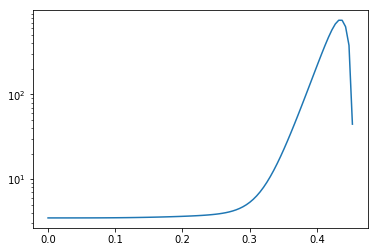

In [5]:
f,ax = plt.subplots()
ax.semilogy(rarr, -Bzarr*1e4)
plt.show()

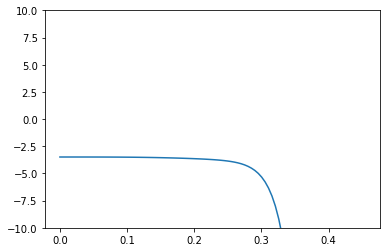

In [6]:
f,ax = plt.subplots()
ax.plot(rarr, Bzarr*1e4)
ax.set_ylim([-10,10])
plt.show()